In [1]:
import statsmodels.formula.api as sm
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Detecting Multicollinearity Using Variance Inflation Factors

In [2]:
class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = SimpleImputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [13]:
X= pd.read_csv('./X1.csv', index_col=0)

In [14]:
X.head()

,High_Level_Asset_Class[T.P&C],High_Level_Asset_Class[T.S&T],High_Level_Asset_Class[T.Track],weather_station[T.Leeds],weather_station[T.Manchester],weather_station[T.Mirfield],weather_station[T.York],Asset_Number,event,T,...,humidity_24h_d,wind_speed_24h_d,temp_24h_range,temp_1w_d,pressure_1w_d,humidity_1w_d,wind_speed_1w_d,wind_speed_24h_d_h,wind_speed_24h_d_l,temp_1w_range
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1011867.0,0.0,923.439884,...,88.0,4.0,2.78,16.54,1006.0,88.0,4.0,7.0,3.0,4.024564
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1063020.0,0.0,833.960718,...,93.0,4.0,2.22,17.07,1005.0,88.0,3.0,6.0,2.0,4.043420
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10290424.0,0.0,830.185719,...,93.0,4.0,2.22,17.07,1005.0,88.0,3.0,6.0,2.0,4.043420
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14105964.0,1.0,-55.286806,...,100.0,4.0,1.00,6.86,1008.0,93.0,4.0,5.0,3.0,2.196825
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14105964.0,1.0,-455.687685,...,75.0,10.0,5.00,4.75,1021.0,86.0,3.0,21.0,1.0,4.512821


In [15]:
y= X.pop('Asset_Number')

In [16]:
X.columns

Index(['High_Level_Asset_Class[T.P&C]', 'High_Level_Asset_Class[T.S&T]',
       'High_Level_Asset_Class[T.Track]', 'weather_station[T.Leeds]',
       'weather_station[T.Manchester]', 'weather_station[T.Mirfield]',
       'weather_station[T.York]', 'event', 'T', 'temp_24h_d', 'pressure_24h_d',
       'humidity_24h_d', 'wind_speed_24h_d', 'temp_24h_range', 'temp_1w_d',
       'pressure_1w_d', 'humidity_1w_d', 'wind_speed_1w_d',
       'wind_speed_24h_d_h', 'wind_speed_24h_d_l', 'temp_1w_range'],
      dtype='object')

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 938
Data columns (total 21 columns):
High_Level_Asset_Class[T.P&C]      740 non-null float64
High_Level_Asset_Class[T.S&T]      740 non-null float64
High_Level_Asset_Class[T.Track]    740 non-null float64
weather_station[T.Leeds]           740 non-null float64
weather_station[T.Manchester]      740 non-null float64
weather_station[T.Mirfield]        740 non-null float64
weather_station[T.York]            740 non-null float64
event                              740 non-null float64
T                                  740 non-null float64
temp_24h_d                         740 non-null float64
pressure_24h_d                     740 non-null float64
humidity_24h_d                     740 non-null float64
wind_speed_24h_d                   740 non-null float64
temp_24h_range                     740 non-null float64
temp_1w_d                          740 non-null float64
pressure_1w_d                      740 non-null float64

In [18]:
transformer = ReduceVIF()

In [19]:
X = transformer.fit_transform(X, y)

ReduceVIF fit
ReduceVIF transform
Dropping pressure_24h_d with vif=47100.97295100967


C:\Users\olono\AppData\Local\conda\conda\envs\rail\lib\site-packages\statsmodels\regression\linear_model.py:1545: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Dropping pressure_1w_d with vif=847.5155536308798
Dropping humidity_1w_d with vif=387.4102700680176
Dropping temp_1w_d with vif=115.55217294033913
Dropping humidity_24h_d with vif=89.18428975488885
Dropping temp_1w_range with vif=59.19975478667611
Dropping wind_speed_24h_d with vif=44.488702144806545
Dropping wind_speed_1w_d with vif=33.373025830816516
Dropping wind_speed_24h_d_h with vif=21.34369972686145
Dropping temp_24h_d with vif=19.999869931132615
Dropping temp_24h_range with vif=10.128834682160845
Dropping wind_speed_24h_d_l with vif=8.691866451403309
Dropping T with vif=6.455327075708896


In [20]:
def heatMap(df):#Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(16, 16))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

In [21]:
X['Y']=y

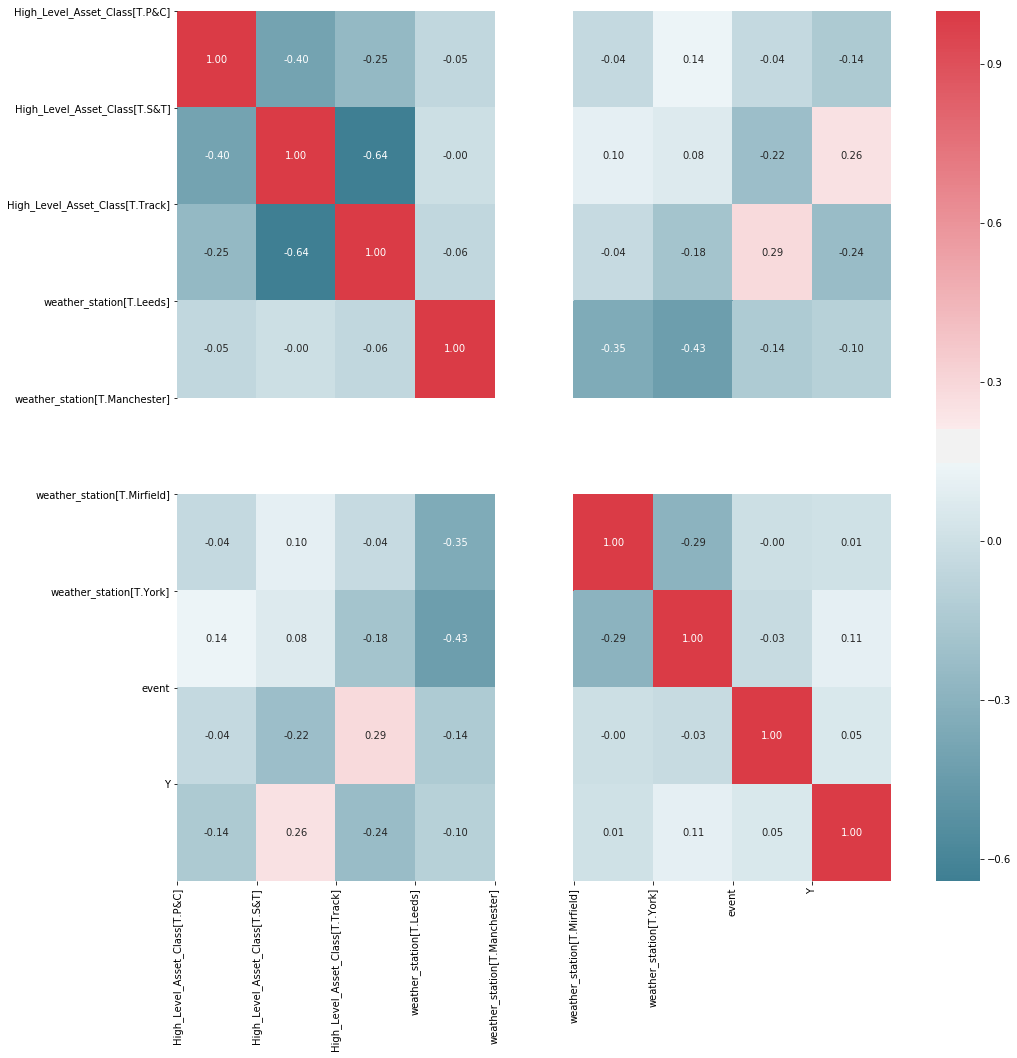

In [22]:
heatMap(X)

In [23]:
X.columns

Index(['High_Level_Asset_Class[T.P&C]', 'High_Level_Asset_Class[T.S&T]',
       'High_Level_Asset_Class[T.Track]', 'weather_station[T.Leeds]',
       'weather_station[T.Manchester]', 'weather_station[T.Mirfield]',
       'weather_station[T.York]', 'event', 'Y'],
      dtype='object')

In [25]:
X['weather_station[T.York]'].describe()

count    740.000000
mean       0.264865
std        0.441560
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: weather_station[T.York], dtype: float64